In [18]:
import control as ctr

In [2]:
from control.matlab import *

In [3]:
import numpy


In [5]:
# DC Motor Speed: Root Locus Controller Design
J = 0.01;
b = 0.1;
K = 0.01;
R = 1;
L = 0.5;
s = tf('s');
P_motor = K/((J*s+b)*(L*s+R)+K**2);

In [24]:
motor_ss = ss(P_motor)
motor_ss

StateSpace(array([[-12.   ,  -2.002],
       [ 10.   ,   0.   ]]), array([[-1.],
       [ 0.]]), array([[ 0. , -0.2]]), array([[0.]]))

In [7]:
response = control.step_response(P_motor)


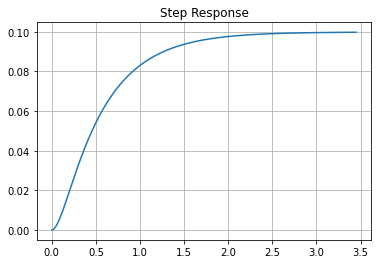

In [16]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(response.time, response.outputs)
plt.title('Step Response')
plt.grid()
plt.show()

In [9]:
#For a 1-rad/sec step reference, the design criteria are the following.

#Settling time less than 2 seconds
#Overshoot less than 5%
#Steady-state error less than 1%

(array([-9.99749922, -2.00250078]), array([], dtype=float64))

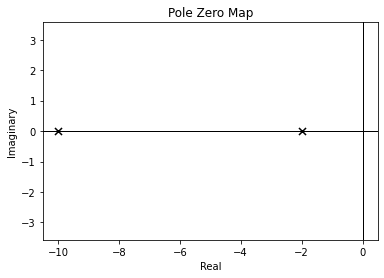

In [10]:
pzmap(P_motor)

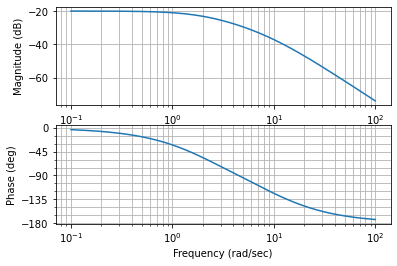

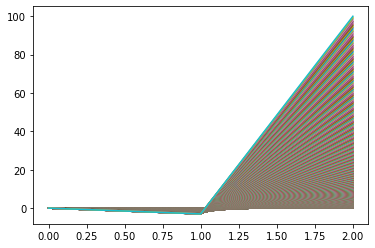

In [22]:
bode = control.bode_plot(P_motor)
plt.figure(2)
plt.plot(bode)
plt.show()

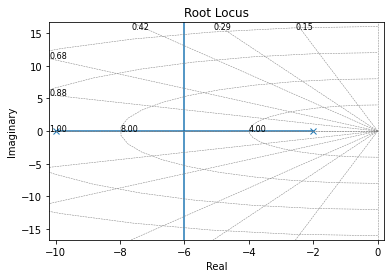

In [20]:
ctr.rlocus(P_motor)
plt.show()

In [31]:
# Tunning with a PID
Kp = 100;
Ki = 200;
Kd = 10;
#G_PID=Kp*(1+(1/Ti*s)+Td*s)
G_PID=(Kd*s**2+Kp*s+Ki)/s

In [32]:
Sys_PID = ctr.feedback(P_motor, G_PID, sign=- 1)

In [33]:
responsePID = control.step_response(Sys_PID)

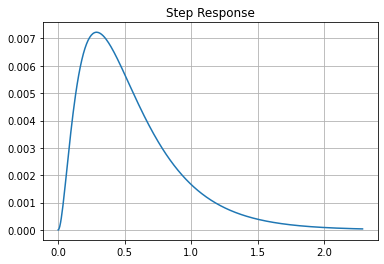

In [34]:
import matplotlib.pyplot as plt
plt.figure(3)
plt.plot(responsePID.time, responsePID.outputs)
plt.title('Step Response')
plt.grid()
plt.show()

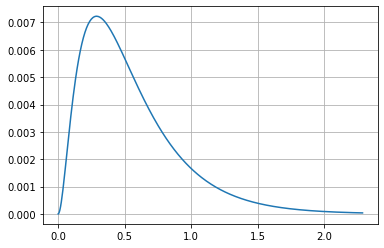

In [40]:
ts, xs = control.step_response(Sys_PID) 
plt.figure(4)
plt.grid()
plt.plot(ts, xs)